In [5]:
import pandas as pd
import os

In [6]:
### Merging 12 months of sales data into a single file

df = pd.read_csv(r"C:\Users\Leah\Documents\Python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
files = [file for file in os.listdir(r"C:\Users\Leah\Documents\Python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\Leah\Documents\Python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv(r"C:\Users\Leah\Documents\Python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\all_data.csv", index=False)  

In [11]:
all_data=pd.read_csv(r"C:\Users\Leah\Documents\Python\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\all_data.csv")
all_data.head()

## add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data




,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0.0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,3.0,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,4.0,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...,...
934245,NaN,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
934246,NaN,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
934247,NaN,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
934248,NaN,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [20]:
### Clean Data

## find and delete nan rows

nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

#drop NAN
all_data = all_data.dropna(how='all')
all_data.head()
#del all_data['Unnamed: 0']
#all_data

#delete OR
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] 
all_data

## change month from string to int
all_data['Month']=all_data['Month'].astype('int32')
all_data






,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
934245,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
934246,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
934247,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
934248,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [22]:
# convert columns to correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])#make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])#make float

In [23]:
### what was best month for sales and what was earned that month

#add column for total sales

all_data['Sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data


results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,54515,9.058842e+06,9.111284e+06
2,67245,1.094442e+07,1.101011e+07
3,85025,1.395604e+07,1.403550e+07
4,102790,1.683836e+07,1.695335e+07
5,93335,1.567563e+07,1.576303e+07
6,76265,1.281013e+07,1.288901e+07
7,80360,1.316270e+07,1.323888e+07
8,67240,1.115173e+07,1.122234e+07
9,65545,1.042496e+07,1.048780e+07


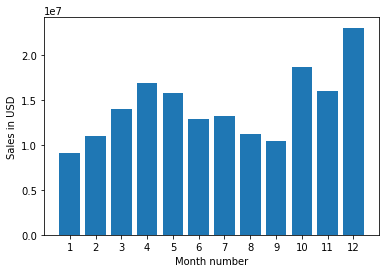

In [24]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

In [ ]:
### What city had the highest number of sales

In [25]:
# add a city column/ .apply function
def get_city(adress):
    return adress.split(',')[1]

def get_state(adress):
    return adress.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [26]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,83010,1.389954e+07,523970,1.397749e+07
Austin TX,55765,9.049368e+06,349145,9.097909e+06
Boston MA,112640,1.818705e+07,705560,1.830821e+07
Dallas TX,83650,1.376314e+07,523100,1.383988e+07
Los Angeles CA,166445,2.710718e+07,1041625,2.726285e+07
New York City NY,139660,2.317685e+07,878705,2.332159e+07
Portland ME,13750,2.235946e+06,85720,2.248791e+06
Portland OR,56515,9.302791e+06,353105,9.353662e+06
San Francisco CA,251195,4.105731e+07,1577600,4.131102e+07


ValueError: shape mismatch: objects cannot be broadcast to a single shape

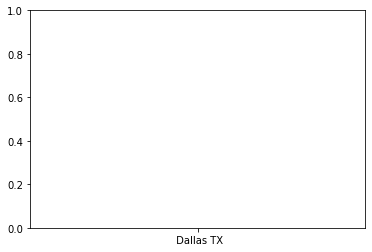

In [35]:
import matplotlib.pyplot as plt

cities = all_data['City'].unique()
y = results['Sales'].unique()

plt.bar(cities, y)
plt.xticks(cities)
plt.ylabel('Sales')
plt.xlabel('Month number')
plt.show(all_data)

